In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import numpy as np
import seaborn as sns

import os
import sys
import math
import plotly.express as px
from scipy.interpolate import make_interp_spline
import plotly.graph_objects as go

#Own Modules
import function_proj as hh
from function_proj import *

In [2]:
current_path = os.getcwd()
sys.path.append(current_path) # main path to repo

In [3]:
#Importing the second data set, with State as a variable
df2 = pd.read_csv('us_states_covid19_daily.csv') 
#Format dates
df2['date_formatted'] = pd.to_datetime(df2['date'], format='%Y%m%d')

### Exercise 1

In [4]:
categories = df2['state'].unique()

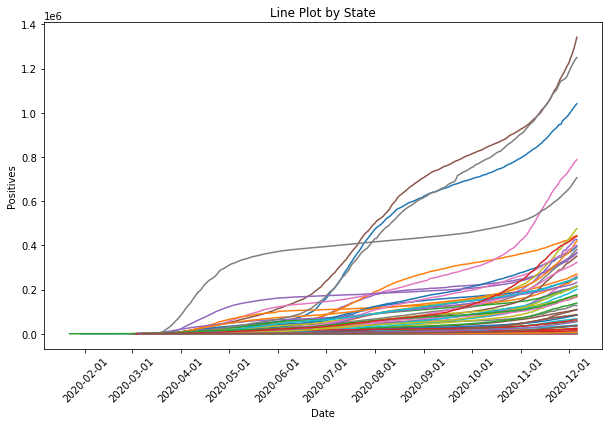

In [5]:
## Line Plot by State
plt.figure(figsize = (10, 6))

for category in categories:
    subset = df2[df2['state'] == category]
    plt.plot(subset['date_formatted'], subset['positive'], label=category)

plt.xlabel('Date')
plt.ylabel('Positives')
plt.title('Line Plot by State')
#plt.legend()

date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)

plt.show()

Here we can observe that, for every State, the number of positive cases of Covid was growing as the time passed.
That being said, the variable 'date' could be affected by the number of tests that each State is realizing.
We could solve part of that by doing a ratio of positive cases in relation to the number of tests of each State.

In [6]:
categories = df2['state'].unique()
# Calculate Ratio Tests
df2['ratio_tests'] = df2['positive'] / df2['totalTestResults']

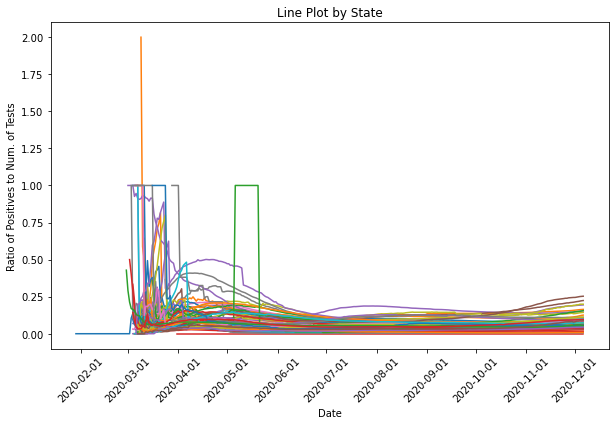

In [7]:
plt.figure(figsize = (10, 6))

for category in categories:
    subset = df2[df2['state'] == category]
    plt.plot(subset['date_formatted'], subset['ratio_tests'], label=category)

plt.xlabel('Date')
plt.ylabel('Ratio of Positives to Num. of Tests')
plt.title('Line Plot by State')
#plt.legend()

date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)

plt.show()

Here, on the other hand, we can observe that it doesn't seem as obvious that positive cases increase as time passes.
It could as well be that the positive cases had been the same during the period covered (2020) but due to a more intensive testing to the end of the year
more cases were discovered. 
We cannot be as sure anymore that actual Covid cases increased over time during 2020.

### Exercise 2

In [8]:
#Importing the first data set, with data separated by states (not with state as a variable, but separated by them)
df1 = pd.read_csv('COVID19_state.csv')


In [9]:
x1 = df1['Tested']
y1 = df1['Deaths']

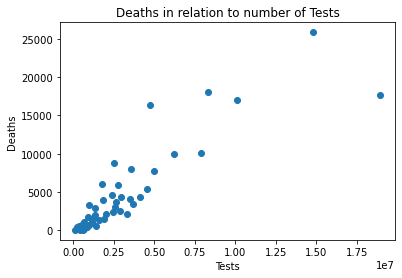

In [10]:
plt.scatter(x1, y1)

plt.xlabel('Tests')
plt.ylabel('Deaths')
plt.title('Deaths in relation to number of Tests')
plt.show()

Here we can observe that the resulting plot seems to show a strong correlation between Tests and Deaths, but we might be missing an important bias.
It is entirely possible that States with more Testing have also more Deaths due to both being explained by a higher population.
Therefore, in the next steps we are going to project the same plot but with variables being converted to a ratio between the variable itself and
the population of the State.

In [11]:
df1['test_pop_ratio'] = df1['Tested'] / df1['Population']
df1['deaths_pop_ratio'] = df1['Deaths'] / df1['Population']

x = df1['test_pop_ratio']
y = df1['deaths_pop_ratio']

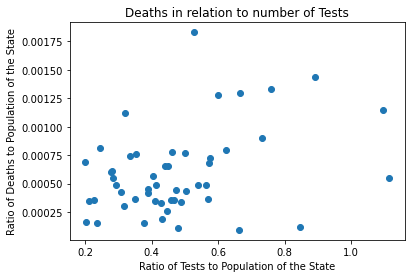

In [12]:
plt.scatter(x, y)

plt.xlabel('Ratio of Tests to Population of the State')
plt.ylabel('Ratio of Deaths to Population of the State')
plt.title('Deaths in relation to number of Tests')
plt.show()

In this second case we can observe that the apparent correlation shown before has mostly disappeared.
It no longer seems that more tests lead to a higher death count.

### Exercise 3

## What are the groups, that suffered most

We tried the variables connected to the age  groups and the level of urbanisation.

In [13]:
df = pd.read_csv(r'COVID19_state.csv')
df.head()

State    Tested  Infected  Deaths  Population  Pop Density    Gini  \
0      Alaska    620170     17057      84      734002       1.2863  0.4081   
1     Alabama   1356420    194892    2973     4908621      96.9221  0.4847   
2    Arkansas   1363429    113641    1985     3038999      58.4030  0.4719   
3     Arizona   1792602    248139    5982     7378494      64.9550  0.4713   
4  California  18912501    930628   17672    39937489     256.3727  0.4899   

   ICU Beds  Income    GDP  ...  Hospitals  Health Spending  Pollution  \
0       119   59687  73205  ...         21            11064        6.4   
1      1533   42334  45219  ...        101             7281        8.1   
2       732   42566  42454  ...         88             7408        7.1   
3      1559   43650  48055  ...         83             6452        9.7   
4      7338   62586  74205  ...        359             7549       12.8   

   Med-Large Airports  Temperature  Urban  Age 0-25  Age 26-54  Age 55+  \
0                 1.0         26.6   66.0      0.36       0.39     0.25   
1                 1.0         62.8   59.0      0.33       0.37     0.31   
2                 0.0         60.4   56.2      0.34       0.37     0.30   
3                 1.0         60.3   89.8      0.33       0.36     0.30   
4                 9.0         59.4   95.0      0.33       0.40     0.26   

   School Closure Date  
0             03/19/20  
1             03/16/20  
2             03/17/20  
3             03/16/20  
4             03/19/20  

[5 rows x 26 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                51 non-null     object 
 1   Tested               51 non-null     int64  
 2   Infected             51 non-null     int64  
 3   Deaths               51 non-null     int64  
 4   Population           51 non-null     int64  
 5   Pop Density          51 non-null     float64
 6   Gini                 51 non-null     float64
 7   ICU Beds             51 non-null     int64  
 8   Income               51 non-null     int64  
 9   GDP                  51 non-null     int64  
 10  Unemployment         51 non-null     float64
 11  Sex Ratio            51 non-null     float64
 12  Smoking Rate         51 non-null     float64
 13  Flu Deaths           51 non-null     float64
 14  Respiratory Deaths   51 non-null     float64
 15  Physicians           51 non-null     int64

In [15]:
df.describe()

Tested       Infected        Deaths    Population   Pop Density  \
count  5.100000e+01      51.000000     51.000000  5.100000e+01     51.000000   
mean   2.904946e+06  179626.666667   4357.745098  6.496451e+06    431.560508   
std    3.590449e+06  208077.881595   5637.548491  7.450657e+06   1647.225920   
min    1.340180e+05    2219.000000     58.000000  5.670250e+05      1.286300   
25%    8.216280e+05   46623.500000    650.500000  1.802113e+06     50.604850   
50%    1.792602e+06  120865.000000   2113.000000  4.499692e+06    108.049700   
75%    3.403572e+06  208161.000000   4983.500000  7.587794e+06    223.983100   
max    1.891250e+07  930628.000000  25838.000000  3.993749e+07  11814.541000   

            Gini     ICU Beds        Income            GDP  Unemployment  ...  \
count  51.000000    51.000000     51.000000      51.000000     51.000000  ...   
mean    0.466165  1466.411765  51597.607843   61497.333333      3.515686  ...   
std     0.023455  1562.124594   8224.387459   22648.274324      0.831233  ...   
min     0.406300    94.000000  37994.000000   37948.000000      2.200000  ...   
25%     0.452050   327.000000  45981.000000   51156.000000      2.850000  ...   
50%     0.468000  1134.000000  49417.000000   57492.000000      3.400000  ...   
75%     0.479500  1841.500000  56610.000000   65971.500000      3.800000  ...   
max     0.542000  7338.000000  74561.000000  200277.000000      5.800000  ...   

          Physicians   Hospitals  Health Spending  Pollution  \
count      51.000000   51.000000        51.000000  51.000000   
mean    19711.666667  101.921569      8332.156863   7.413725   
std     22532.917088   88.881909      1256.751246   1.457535   
min      1172.000000    7.000000      5982.000000   4.400000   
25%      5656.000000   44.500000      7390.000000   6.650000   
50%     12205.000000   89.000000      8107.000000   7.400000   
75%     23991.500000  129.500000      9095.500000   8.150000   
max    112906.000000  523.000000     11944.000000  12.800000   

       Med-Large Airports  Temperature       Urban   Age 0-25  Age 26-54  \
count           51.000000    51.000000   51.000000  51.000000  51.000000   
mean             1.215686    51.999020   74.107843   0.323529   0.376471   
std              1.758564     8.627992   14.885481   0.027116   0.019680   
min              0.000000    26.600000   38.700000   0.260000   0.350000   
25%              0.000000    45.300000   65.400000   0.305000   0.370000   
50%              1.000000    51.700000   74.200000   0.320000   0.370000   
75%              1.000000    58.300000   87.550000   0.340000   0.385000   
max              9.000000    70.700000  100.000000   0.420000   0.480000   

         Age 55+  
count  51.000000  
mean    0.299020  
std     0.030936  
min     0.210000  
25%     0.290000  
50%     0.300000  
75%     0.310000  
max     0.370000  

[8 rows x 24 columns]

In [16]:
# Calculate the correlation between number of effected and deaths
df['Infected'].corr(df['Deaths'])

0.8441197182278773

In [17]:
# Add the column, which shows the share of deaths in the total amount of infected
df['Ratio of deaths over infected'] = df['Deaths']/df['Infected']
print(df.head())

        State    Tested  Infected  Deaths  Population  Pop Density    Gini  \
0      Alaska    620170     17057      84      734002       1.2863  0.4081   
1     Alabama   1356420    194892    2973     4908621      96.9221  0.4847   
2    Arkansas   1363429    113641    1985     3038999      58.4030  0.4719   
3     Arizona   1792602    248139    5982     7378494      64.9550  0.4713   
4  California  18912501    930628   17672    39937489     256.3727  0.4899   

   ICU Beds  Income    GDP  ...  Health Spending  Pollution  \
0       119   59687  73205  ...            11064        6.4   
1      1533   42334  45219  ...             7281        8.1   
2       732   42566  42454  ...             7408        7.1   
3      1559   43650  48055  ...             6452        9.7   
4      7338   62586  74205  ...             7549       12.8   

   Med-Large Airports  Temperature  Urban  Age 0-25  Age 26-54  Age 55+  \
0                 1.0         26.6   66.0      0.36       0.39     0.25   
1 

## Covid effects in urban and rural areas

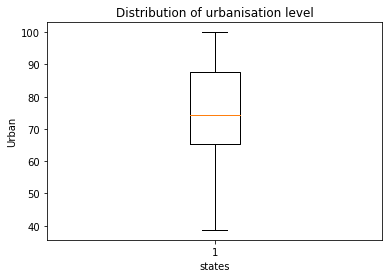

In [18]:
# Plot the distribution of the values in Urban column
fig, ax = plt.subplots()
ax.boxplot(df['Urban'])
ax.set_xlabel('states')
ax.set_ylabel('Urban')
ax.set_title('Distribution of urbanisation level')
plt.show()

There are no outliers.

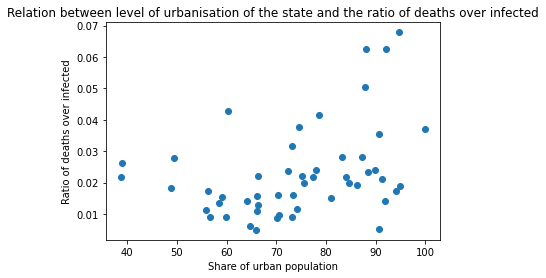

In [19]:
# Plot relations between level of urbanisation and ratio of deaths over infected
fig, ax = plt.subplots()
ax.scatter(df['Urban'], df['Ratio of deaths over infected'])
ax.set_xlabel('Share of urban population')
ax.set_ylabel('Ratio of deaths over infected')
ax.set_title('Relation between level of urbanisation of the state and the ratio of deaths over infected')
plt.show()

In [20]:
# Calculate correlation between level of urbanisation and ratio of deaths over infected
df['Urban'].corr(df['Ratio of deaths over infected'])

0.3718027102504939

Higher level of urbanisation is related to the higher level of deaths over infected.

In [21]:
# Follow the same procedure for the 75% of values. Drop all the rows, if level of urbanisation < 87
df_less_urban = df[df['Urban'] < 87]

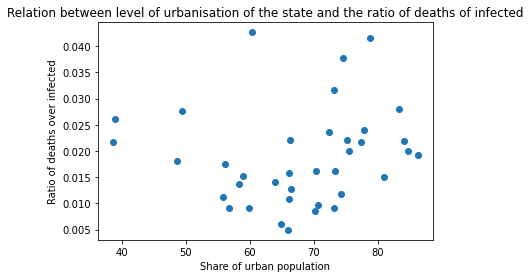

In [22]:
# Plot relations between level of urbanisation and ratio of deaths over infected for less urbanised states only
fig, ax = plt.subplots()
ax.scatter(df_less_urban['Urban'], df_less_urban['Ratio of deaths over infected'])
ax.set_xlabel('Share of urban population')
ax.set_ylabel('Ratio of deaths over infected')
ax.set_title('Relation between level of urbanisation of the state and the ratio of deaths of infected')
plt.show()

In [23]:
# Calculate correlation between level of urbanisation and ratio of deaths over infected for less urbanised states
df_less_urban['Urban'].corr(df_less_urban['Ratio of deaths over infected'])

0.10843366053075751

For less urbanised states correlation still exists, but it's quite low.

General overview: correlation between level of urbanisation and ratio of deaths over infected is positive (means, the higher is the level of urbanisation, the higher is the number of deaths over the whole number of infected). Still, it's moderate. Probably, because it's biased: i assume, that the higher level of urbanisation, the higher is the level of infected over the whole population (cause the cities are just more crowded). But, on the other hand, i assume, that the is higher the level of urbanisation, the lower is the level of deaths over the whole population (cause of the level of medicine and (needs to be proven as well) the accessibility to ICU beds).

In [24]:
# Add the columns, which shows the share of deaths/infected in the whole population
df['Infected over population'] = df['Infected']*df['Population']
df['Deaths over population'] = df['Deaths']*df['Population']
print(df.head())

        State    Tested  Infected  Deaths  Population  Pop Density    Gini  \
0      Alaska    620170     17057      84      734002       1.2863  0.4081   
1     Alabama   1356420    194892    2973     4908621      96.9221  0.4847   
2    Arkansas   1363429    113641    1985     3038999      58.4030  0.4719   
3     Arizona   1792602    248139    5982     7378494      64.9550  0.4713   
4  California  18912501    930628   17672    39937489     256.3727  0.4899   

   ICU Beds  Income    GDP  ...  Med-Large Airports  Temperature  Urban  \
0       119   59687  73205  ...                 1.0         26.6   66.0   
1      1533   42334  45219  ...                 1.0         62.8   59.0   
2       732   42566  42454  ...                 0.0         60.4   56.2   
3      1559   43650  48055  ...                 1.0         60.3   89.8   
4      7338   62586  74205  ...                 9.0         59.4   95.0   

   Age 0-25  Age 26-54  Age 55+  School Closure Date  \
0      0.36       0.39  

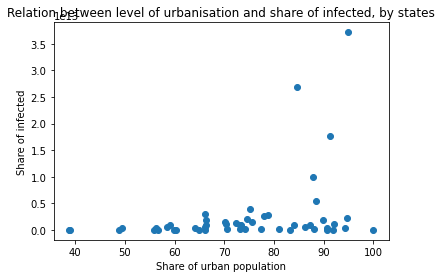

In [25]:
# Plot relations between level of urbanisation and number of infected as a share of total population of the state
fig, ax = plt.subplots()
ax.scatter(df['Urban'], df['Infected over population'])
ax.set_xlabel('Share of urban population')
ax.set_ylabel('Share of infected')
ax.set_title('Relation between level of urbanisation and share of infected, by states')
plt.show()

In [26]:
# Calculate correlation level of urbanisation and number of infected as a share of total population of the state
df['Urban'].corr(df['Infected over population'])

0.32780528503716

Higher is level of urbanisation, more people are getting affected. Level of correlation is also moderate.

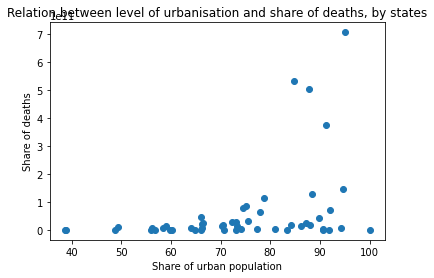

In [27]:
# Plot relations between level of urbanisation and number of deaths as a share of total population of the state
fig, ax = plt.subplots()
ax.scatter(df['Urban'], df['Deaths over population'])
ax.set_xlabel('Share of urban population')
ax.set_ylabel('Share of deaths')
ax.set_title('Relation between level of urbanisation and share of deaths, by states')
plt.show()

In [28]:
# Calculate correlation between level of urbanisation and number of infected as a share of total population of the state
df['Urban'].corr(df['Deaths over population'])

0.37717210048980826

Higher is level of urbanisation, more people are getting affected. Correlation is moderate as well.
NB the sign is surprising to me, i assumed, that death rate should be higher in the more rural areas because of lack of medicine and number of ICU beds.

In [29]:
# Add the column, which shows the level of accessibility of ICU beds for population
df['Ratio of ICU beds over population'] = df['ICU Beds']/df['Population']
print(df.head())

        State    Tested  Infected  Deaths  Population  Pop Density    Gini  \
0      Alaska    620170     17057      84      734002       1.2863  0.4081   
1     Alabama   1356420    194892    2973     4908621      96.9221  0.4847   
2    Arkansas   1363429    113641    1985     3038999      58.4030  0.4719   
3     Arizona   1792602    248139    5982     7378494      64.9550  0.4713   
4  California  18912501    930628   17672    39937489     256.3727  0.4899   

   ICU Beds  Income    GDP  ...  Temperature  Urban  Age 0-25  Age 26-54  \
0       119   59687  73205  ...         26.6   66.0      0.36       0.39   
1      1533   42334  45219  ...         62.8   59.0      0.33       0.37   
2       732   42566  42454  ...         60.4   56.2      0.34       0.37   
3      1559   43650  48055  ...         60.3   89.8      0.33       0.36   
4      7338   62586  74205  ...         59.4   95.0      0.33       0.40   

   Age 55+  School Closure Date  Ratio of deaths over infected  \
0     0.

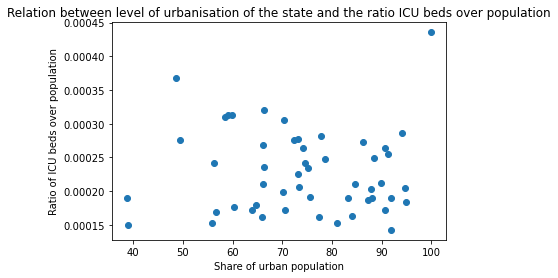

In [30]:
# Plot relations between level of urbanisation and ratio of ICU beds over population of the state
fig, ax = plt.subplots()
ax.scatter(df['Urban'], df['Ratio of ICU beds over population'])
ax.set_xlabel('Share of urban population')
ax.set_ylabel('Ratio of ICU beds over population')
ax.set_title('Relation between level of urbanisation of the state and the ratio ICU beds over population')
plt.show()

In [31]:
# Plot relations between level of urbanisation and ratio of ICU beds over population of the state
df['Urban'].corr(df['Ratio of ICU beds over population'])

-0.008553038533163816

There is very weak and negative correlation. We can not say anything about the relations between level of urbanisation of the state and the accessability to the ICU beds. Seems, all states are provided with ICU beds kind of equally.

## Relation between sex ratio and the ratio of deaths over infected

Defining the sex ratio as the ratio of the number of males to the number of females in a population. A sex ratio of 1.054688 would suggest that, on average, there are approximately 1.05 males for every female in the population. In that sense, a value below 1 indicates more females and a value above 1 indicates more males. As we can see from the mean of the 'Sex Ratio' column, there is more women than male in a 0.96 mean. As well, the correlation as we can see is strongly negative with a -0.49 value. This means that when the sex ratio decreases, the female population increases and most of the deaths are probably going to be women.

In [32]:
df['Sex Ratio'].describe()

count    51.000000
mean      0.963721
std       0.031868
min       0.888570
25%       0.942516
50%       0.958850
75%       0.982687
max       1.054688
Name: Sex Ratio, dtype: float64

In [33]:
df_less_urban['Sex Ratio'].corr(df_less_urban['Ratio of deaths over infected'])

-0.48827374873174345

## The effects of COVID for different age groups

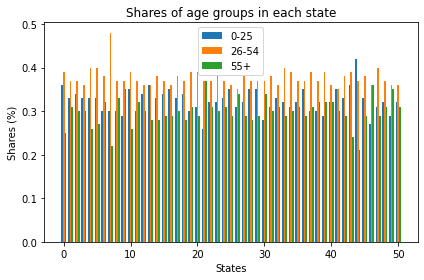

In [34]:
# Plot the shares of different age groups for each state
x = np.arange(len(df['State']))
fig, ax = plt.subplots()
bar_width = 0.25
ax.bar(x - bar_width, df['Age 0-25'], bar_width, label='0-25')
ax.bar(x, df['Age 26-54'], bar_width, label='26-54')
ax.bar(x + bar_width, df['Age 55+'], bar_width, label='55+')
#plt.xticks(x, df['State'])
plt.xlabel('States')
plt.ylabel('Shares (%)')
plt.title('Shares of age groups in each state')
plt.legend()
plt.tight_layout()
plt.show()

For the majority of states the share od middle age groups is higher, than other two.

In [35]:
# Check the correlation between age group and level of infected over population
print(df['Age 0-25'].corr(df['Infected over population']))
print(df['Age 26-54'].corr(df['Infected over population']))
print(df['Age 55+'].corr(df['Infected over population']))

0.06714346950330365
0.19315362922509002
-0.22620970855484673


In [36]:
# Check the correlation between age group and level of deaths over population
print(df['Age 0-25'].corr(df['Deaths over population']))
print(df['Age 26-54'].corr(df['Deaths over population']))
print(df['Age 55+'].corr(df['Deaths over population']))

0.011801635448012477
0.20408639368319267
-0.18567161939096533


For young and middle age group in both cases, the higher is the age group share, the higher is the level of infected/dead over population. For the old group the relations are negative. Still, the correlation coefficients are very low. 

In [37]:
# Check the correlation between age group and level of death rate for infected people
print(df['Age 0-25'].corr(df['Ratio of deaths over infected']))
print(df['Age 26-54'].corr(df['Ratio of deaths over infected']))
print(df['Age 55+'].corr(df['Ratio of deaths over infected']))

-0.4710001071841439
0.262672971532891
0.18961852023483783


In this case, the higher share of young group, the lower level of deaths/infected. Correlation is moderate.
For other two groups the answer shall be quite th oposite and correlation is weaker.
The main problem here is the fact, that we don't know the ratio of deaths/infected over population for particular age groups separately. WIth the understanding, that the share of middle age group is constantly higher than for other two, i assume, that it translates most of the effect.
In this case, we need to come with some age index for every state (one value per state).

To build the following index we assign coefficient = 1 to a young group (0-25), coefficient = 2 to a middle age group (26-54) and coefficient = 3 to an old group (55+), then we weight it according to the share of each group in the population of the state. The age index itself is a sum of three coefficients weighted.

In [38]:
# Create an age index with the "weighted" values for each age group
df['Age 0-25, weighted'] = df['Age 0-25']*1
df['Age 26-54, weighted'] = df['Age 26-54']*2
df['Age 55+, weighted'] = df['Age 55+']*3
df['Age index'] = df['Age 0-25, weighted'] + df['Age 26-54, weighted'] + df['Age 55+, weighted']
print(df.head())

        State    Tested  Infected  Deaths  Population  Pop Density    Gini  \
0      Alaska    620170     17057      84      734002       1.2863  0.4081   
1     Alabama   1356420    194892    2973     4908621      96.9221  0.4847   
2    Arkansas   1363429    113641    1985     3038999      58.4030  0.4719   
3     Arizona   1792602    248139    5982     7378494      64.9550  0.4713   
4  California  18912501    930628   17672    39937489     256.3727  0.4899   

   ICU Beds  Income    GDP  ...  Age 55+  School Closure Date  \
0       119   59687  73205  ...     0.25             03/19/20   
1      1533   42334  45219  ...     0.31             03/16/20   
2       732   42566  42454  ...     0.30             03/17/20   
3      1559   43650  48055  ...     0.30             03/16/20   
4      7338   62586  74205  ...     0.26             03/19/20   

   Ratio of deaths over infected  Infected over population  \
0                       0.004925               12519872114   
1               

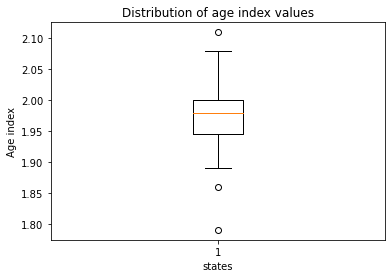

In [39]:
# Plot the distribution of the values of age index
fig, ax = plt.subplots()
ax.boxplot(df['Age index'])
ax.set_xlabel('states')
ax.set_ylabel('Age index')
ax.set_title('Distribution of age index values')
plt.show()

In [40]:
# Calculate outliers for age index
# NB I don't know why it doesn't run sometimes, but we don't actually need to remove outliers, so we can easily skip it
df['Age index'].median()
#iqr = iqr(df['Age index'])
q1 = df['Age index'].quantile(0.25)
q3 = df['Age index'].quantile(0.75)
iqr = q3 - q1
lower_threshhold = np.quantile(df['Age index'], 0.25) - 1.5 * iqr
upper_threshhold = np.quantile(df['Age index'], 0.75) + 1.5 * iqr
df_lower = df[df['Age index'] <= lower_threshhold]
print(df_lower)
df_upper = df[df['Age index'] >= upper_threshhold]
print(df_upper)

    State   Tested  Infected  Deaths  Population  Pop Density    Gini  \
43  Texas  8291703    909257   18097    29472295     112.8204  0.4800   
44   Utah  1410145    117706     614     3282115      39.9430  0.4063   

    ICU Beds  Income    GDP  ...  Age 55+  School Closure Date  \
43      6199   49161  61167  ...     0.24             03/23/20   
44       565   45340  55550  ...     0.21             03/16/20   

    Ratio of deaths over infected  Infected over population  \
43                       0.019903            26797890534815   
44                       0.005216              386324628190   

    Deaths over population  Ratio of ICU beds over population  \
43            533360122615                           0.000210   
44              2015218610                           0.000172   

    Age 0-25, weighted  Age 26-54, weighted  Age 55+, weighted  Age index  
43                0.36                 0.78               0.72       1.86  
44                0.42                 0.74

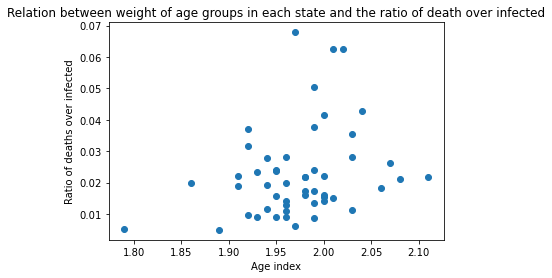

In [41]:
# Plot relations between age index and ratio of death over infected
fig, ax = plt.subplots()
ax.scatter(df['Age index'], df['Ratio of deaths over infected'])
ax.set_xlabel('Age index')
ax.set_ylabel('Ratio of deaths over infected')
ax.set_title('Relation between weight of age groups in each state and the ratio of death over infected')
plt.show()

In [42]:
# Calculate correlations between age index and ratio of death over infected, as well as number of infected/deaths as a share of the whole population of the state
print(df['Age index'].corr(df['Ratio of deaths over infected']))
print(df['Age index'].corr(df['Infected over population']))
print(df['Age index'].corr(df['Deaths over population']))

0.27543865146209473
-0.21015895255656017
-0.16126671110757862


For "older" states the death rate of infected is higher, but in te opposite way, the shares of infected/deaths in the whole population for the "older" states are lower. Anyway, the correlations are quite weak, so we can not state, there are particular relations.
NB I guess, we can leave just the first one. Even considering the fact, that correlation is not strong, it's easier to interpret. The reason for a weak correlation is the simplicity of weithening approach and the low variance of the index. Probably, shall come with some more sophisticated ideas.

In [43]:
# Remove outliers
df_without_outliers = df[(df['Age index'] > 1.79) & (df['Age index'] <= 2.11)]

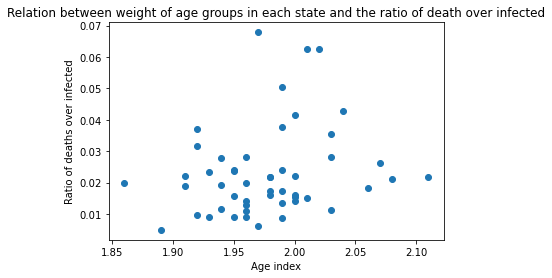

In [44]:
# Plot relations between age index and ratio of death over infected for the dataset without "outlier" states
fig, ax = plt.subplots()
ax.scatter(df_without_outliers['Age index'], df_without_outliers['Ratio of deaths over infected'])
ax.set_xlabel('Age index')
ax.set_ylabel('Ratio of deaths over infected')
ax.set_title('Relation between weight of age groups in each state and the ratio of death over infected')
plt.show()

In [45]:
# Calculate correlations between age index and ratio of death over infected, as well as number of infected/deaths as a share of the whole population of the state
print(df_without_outliers['Age index'].corr(df_without_outliers['Ratio of deaths over infected']))
print(df_without_outliers['Age index'].corr(df_without_outliers['Infected over population']))
print(df_without_outliers['Age index'].corr(df_without_outliers['Deaths over population']))

0.22216042894882695
-0.26502164797543476
-0.2162191316178204


The level of correlations for the dataset without age outliers is quite the same as in the case with outliers. Both in terms of sign and significance.

## Affects of COVID on smokers and non-smokers

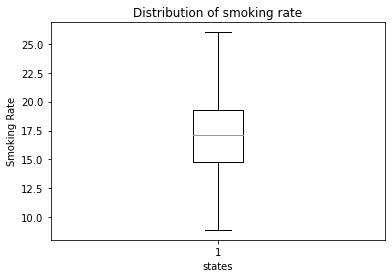

In [46]:
# Plot the distribution of the values in Smoking Rate column column
fig, ax = plt.subplots()
ax.boxplot(df['Smoking Rate'])
ax.set_xlabel('states')
ax.set_ylabel('Smoking Rate')
ax.set_title('Distribution of smoking rate')
plt.show()

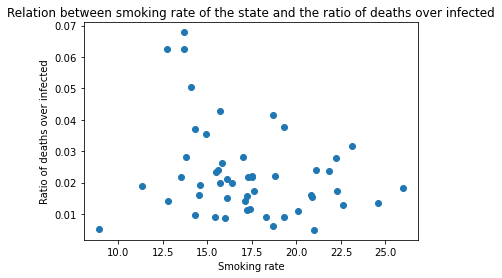

In [47]:
# Plot relations between level of urbanisation and ratio of deaths over infected
fig, ax = plt.subplots()
ax.scatter(df['Smoking Rate'], df['Ratio of deaths over infected'])
ax.set_xlabel('Smoking rate')
ax.set_ylabel('Ratio of deaths over infected')
ax.set_title('Relation between smoking rate of the state and the ratio of deaths over infected')
plt.show()

In [48]:
# Calculate correlation between smoking rate and ratio of deaths over infected,as well as as well as number of infected/deaths as a share of the whole population of the state
print(df['Smoking Rate'].corr(df['Ratio of deaths over infected']))
print(df['Smoking Rate'].corr(df['Infected over population']))
print(df['Smoking Rate'].corr(df['Deaths over population']))

-0.2502532295028208
-0.2579044479417398
-0.2853849277875387


The level of correlation is not very high, but it shows that the higher smoking rate is, the lower ratio od death for infected people. The same can be said about the relation between smoking rate and shares of infected/deaths over population.
NB it sound weird anyway, i can not interpret it really.

## Matrix of correlations

In [49]:
# Drop columns which can not be correlated
#df1 = df.drop(columns=['State','School Closure Date', 'Infected', 'Deaths', 'Population', 'ICU Beds', 'Flu Deaths', 'Respiratory Deaths', 'Physicians', 'Hospitals', 'Med-Large Airports', 'Tested', 'adultInf', 'youngInf', 'seniorInf', ])

In [50]:
# Check all the correlations possible
correlation_matrix1 = df1.corr()
print(correlation_matrix1)

                      Tested  Infected    Deaths  Population  Pop Density  \
Tested              1.000000  0.877429  0.887963    0.917761    -0.046610   
Infected            0.877429  1.000000  0.844120    0.957623    -0.087721   
Deaths              0.887963  0.844120  1.000000    0.842214    -0.023913   
Population          0.917761  0.957623  0.842214    1.000000    -0.082282   
Pop Density        -0.046610 -0.087721 -0.023913   -0.082282     1.000000   
Gini                0.446967  0.389080  0.522758    0.380073     0.506948   
ICU Beds            0.886886  0.962232  0.840416    0.978022    -0.079125   
Income              0.369927  0.111118  0.374086    0.216398     0.019956   
GDP                 0.101752 -0.031174  0.086756    0.018147     0.898326   
Unemployment        0.011016 -0.021688  0.059856    0.021802     0.284099   
Sex Ratio          -0.202278 -0.201121 -0.294413   -0.179096    -0.401153   
Smoking Rate       -0.282789 -0.186406 -0.242660   -0.237066    -0.174545   

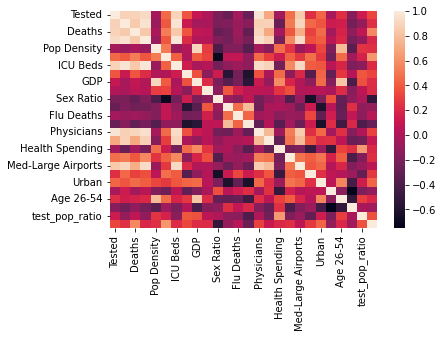

In [51]:
# Map of correlation coefficients
ax = sns.heatmap(df1.corr())

### Exercise 4

### Instruction: Modeling the spread of a disease (Covid).

The model has been designed to showcase the time that will take, for a group of people (10), 
to spread an infectious disease to the rest of the population (1000). 

#### Parameters & Assumptions:  

Mandatory:
* Infection rate : 3 people / day
* probability of infection: 0.05

Additional:
* Adjusted propagation (Proportionally decreasing the susceptible population to the increase of the infected base)
* SIR Model: Recovered (6 days after infected, 90%) , dead(10%), Susceptible
* hospital avg capacity index : 2.96 beds per 1000 people --> 338 available beds

#### SIR Methodology:   
The SIR model shows the transition of people across multiple conditions/states resulting in a more accurate representation 
of the effects of a infectious disease in a given population.

1. Balance the increasing number of infections with recovery and death to yield a more realistic evolution of the disease.
2. Estimate the potential volume of dead people.
3. Estimate the time for the infection to end.
4. Explain the stages of a disease

#### Introducing a new Policy (Vaccinations)
We've model the implementation of a new policy(Vaccination) on day 3, as requested on the instruction.
The objective will be to measure the impact (replacing probability of 0.05 for 0.01) of this new vaccine on the spread of the population. For which, we will make a comparisson of the two curves and calculate the delta.

#### Analysis of the change rates (slopes)
Finally we will analyze the slope curves from each model and determine the dates in which the spread was at its most critical state. Moreover, we will make recommendations/suggestions of when should we implement the corrective actions to prevent the infection of the whole population. 


In [52]:
# Generate first model
df = model_1()

### How many people were infected by D3?

In [53]:
d3_infected = df[df['date'] <= 3]
fig = px.line(d3_infected, x='date', y='infected', title='Number of Infected First 3 Days = 17', labels=dict(date="Days", infected="Infected Persons"))
fig.show()

As we can observe in the graph above (original model/No vaccine), we can expect to see a 70% increase in the number of infected people by day 3. Given that the speed of the spread is very aggresive we will consider it to be already a potential epidemic by day 3 (potential considering that less than 1% of the population got infected). 

On the other hand, we can see that there's an inflection point on day 2, which could indicate that by that time the disease starts to become more difficult to control.

### When will the entire population be infected (based on simple model)?

In [54]:
fig = px.line(df, x='date', y='infected', title='Infected Population = Day 65 ', labels=dict(date="Days", infected="Infected Persons"))
fig.show()

Here we can see that (based on our simple infection model), the disease should fully infect our population (1000) by day 65.

## Analyzing the SIR Model

In [55]:
df3 = sir_model()

In [56]:
# Join with first model to get infected values
df_merge = df3.merge(df, on='date', how='left', indicator=True)

In [57]:
#Calculate infection curve
df_merge['infect'] = df_merge['infected'] - df_merge['recovers'] - df_merge['dead']
# Add Susceptible population
df_merge['test'] = 1000 - df_merge['infected'] - df_merge['dead']
# Make infection curve higher than zero
df_merge['infect_n'] = np.where(df_merge['infect'] <0, 0, df_merge['infect'])
# Make susceptible curve higher than zero
df_merge['Susceptible'] = np.where(df_merge['test'] <0, 0, df_merge['test'])

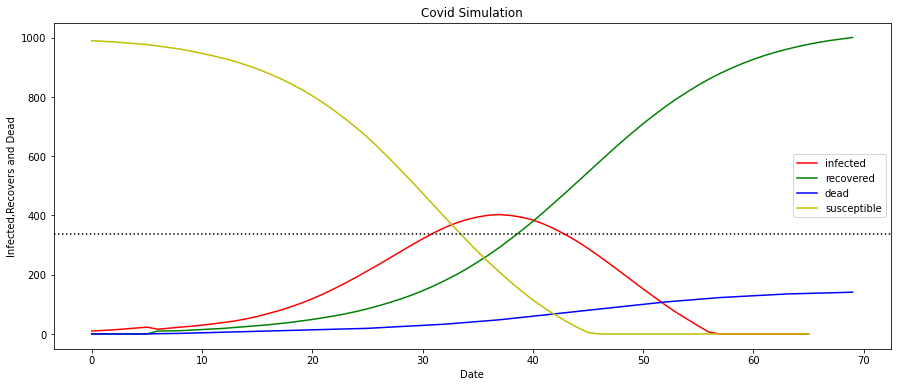

In [58]:

plt.figure(figsize=(15,6))
#plot both curves same chart
plt.plot(df_merge['date'], df_merge['infect_n'], color='r', label='infected')
plt.plot(df_merge['date'], df_merge['recovers'], color='g', label='recovered')
plt.plot(df_merge['date'], df_merge['dead'], color='b', label='dead')
plt.plot(df_merge['date'], df_merge['Susceptible'], color='y', label='susceptible')

# Naming the x-axis and y-axis
plt.xlabel("Date")
plt.ylabel("Infected,Recovers and Dead")

# Adding a title to the graph
plt.title("Covid Simulation")
plt.axhline(y = 338, color = 'black', linestyle = ':')
# Adding a legend, which helps recognize the curve according to its color
plt.legend()

# Displaying the plot
plt.show()

SIR - Model (dotted black line is the avg number of beds in hospitals in spain (capacity = 2.93 beds per 1000 people)
This graph shows how people transition between states, which allow us to better model the stages of the disease propagation.

Taking into account both the recovered and dead population, we've been able to determine 3 stages of infection:
* Stage 1 (Innitiation): first 10 days we can see that the infection base starts to slowly infect our susceptible population, already signs of a high rate of contagion. This stage could be described as a period of recognition and investigation.
* Stage 2 (accelaration): Day 10 to Day 30 the disease spreads at an exponentially rate, to the point of reaching the maximum capacity of hospitals (338 beds).
* Stage 3 (Critical): With not enough beds available at hospitals and number of infected people at it's peak, between day 30 and day ~43 the risk of death increased considerably, yielding at an increasing number of infected during that period.
* Stage 4 (Desaceleration): Day 43 onwards we see that the infection cases start to decline. As more people start to recover, hospitals regain capacity and dead also start to increase at a lower rate, which concludes in a progresive decline of the disease in the population. Nevertheless, This stage is delicate if there are no preventive policies.

In the next section of our report, we will show the effects of implementing a vaccine at the very start of the infection.

## Simulating a vaccination at period 3

In [59]:
df2 = model_2()

### How many people will be infected by D10?

In [60]:

# Filter data for the first 10 days
d10_infected_vac = df2[df2['date'] <= 10]
d10_infected_no_vac = df[df['date'] <= 10]

# Create a figure
fig = go.Figure()

# Add traces for both datasets with different line colors and labels
fig.add_trace(go.Scatter(x=d10_infected_vac['date'], y=d10_infected_vac['infected'], mode='lines', name='Infected with vaccine', line=dict(color='red')))
fig.add_trace(go.Scatter(x=d10_infected_no_vac['date'], y=d10_infected_no_vac['infected'], mode='lines', name='Infected no vaccine', line=dict(color='blue')))

# Add labels and titles
fig.update_layout(
    title='Number of Infected First 10 Days [No Vaccine = ~50 , With Vaccine = 26]',
    xaxis_title='Days',
    yaxis_title='Infected Count',
)

fig.show()


## Comparing rates of infection

In [61]:
new_rows = pd.DataFrame({"date":range(df.shape[0],df2.shape[0]), "infected":[df.infected.values[-1] for i in range(df.shape[0],df2.shape[0])]})
df = pd.concat([df, new_rows])

df["type"] = "Infected"
df2["type"] = "Infected with Vaccine"
df["slope"] = df["infected"].diff()/df["date"].diff()
df2["slope"] = df2["infected"].diff()/df2["date"].diff()
df = df.fillna(0)
df2 = df2.fillna(0)
## Join DataFrames
df_merge = pd.concat([df, df2])

In [62]:
#plot both curves same chart
## Infection rate per day
fig = px.line(df_merge, x='date', y='infected', color="type", title='Number of Infected per Day', labels=dict(date="Days", infected="Infected Persons"))
fig = px.line(df_merge, x='date', y='slope', color="type", title='Infection Rate per Day', labels=dict(date="Days", slope="Infection Rate"))
fig.show()

## Days with maximum infection rate

In [63]:
print(df.loc[df.slope == df.slope.max()])
print((df2.loc[df2.slope == df2.slope.max()]))

    date  infected      type  slope
30    30       496  Infected   38.0
31    31       534  Infected   38.0
32    32       572  Infected   38.0
     date  infected                   type  slope
99     99       379  Infected with Vaccine    8.0
100   100       387  Infected with Vaccine    8.0
101   101       395  Infected with Vaccine    8.0
102   102       403  Infected with Vaccine    8.0
103   103       411  Infected with Vaccine    8.0
104   104       419  Infected with Vaccine    8.0
105   105       427  Infected with Vaccine    8.0
106   106       435  Infected with Vaccine    8.0
107   107       443  Infected with Vaccine    8.0
108   108       451  Infected with Vaccine    8.0
109   109       459  Infected with Vaccine    8.0
110   110       467  Infected with Vaccine    8.0
111   111       475  Infected with Vaccine    8.0
112   112       483  Infected with Vaccine    8.0
113   113       491  Infected with Vaccine    8.0
114   114       499  Infected with Vaccine    8.0
115   